In [1]:
#tidyverse imports the following libaries: ggplot2,tibble,tidyr,readr,purrr,dplyr,stringr,forcats
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1.9000     ✔ purrr   0.3.2     
✔ tibble  2.1.1          ✔ dplyr   0.8.1     
✔ tidyr   0.8.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
#mpg is a built in data frame with info about cars
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


Seems like once the data is loaded in (e.g mpg), it's column names become freely accessible at all times. 

<h2>Core concepts: </h2>
<h4>plots ,data, geoms, aestchetics</h4>
<b>Plot:</b>First and generic layer of a sequence of plots<br>
<b>Data:</b>a dataframe which ggplot will use to perform any visualisations we specify later<br>
<b>Geoms ('geometric' layer):</b> second layer of a plot, can be nested and such, represents points, scatters, bars etc any type of plot for the data we delcared earlier <br>
<b>Aesthetics (aes function)</b> Defines x and y plot values as well as color grouping and other aesthetics of the graph we're building.

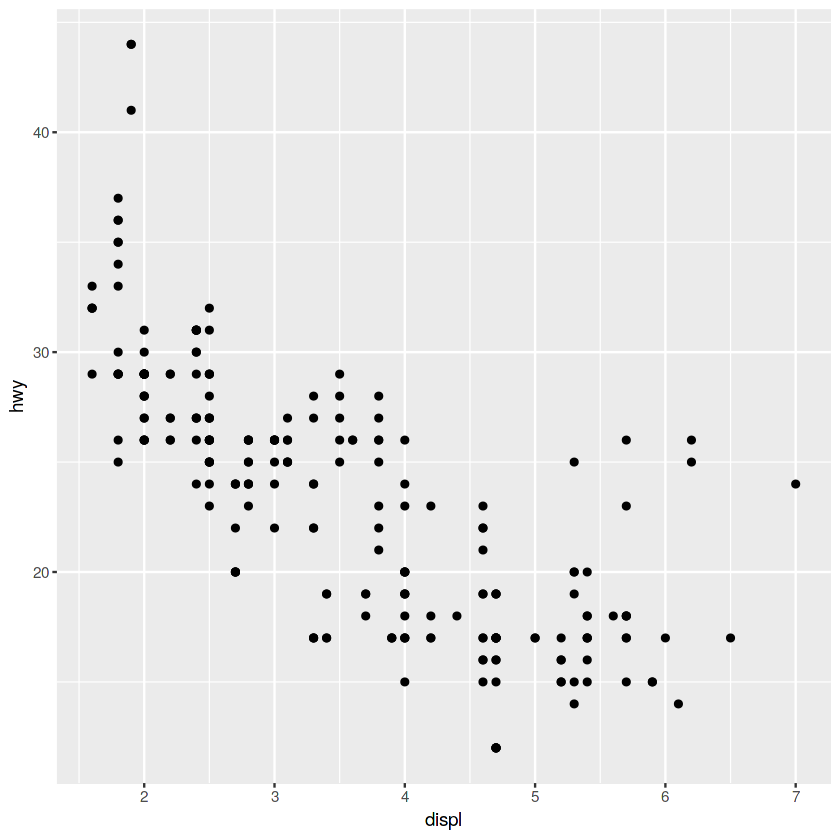

In [3]:
#displ = cars engine size in litres, hwy = highway fuel efficiency
ggplot(data = mpg) + geom_point(mapping = aes(x = displ,y = hwy))

#create a ggplot() then add a geom_point layer, which plots the data

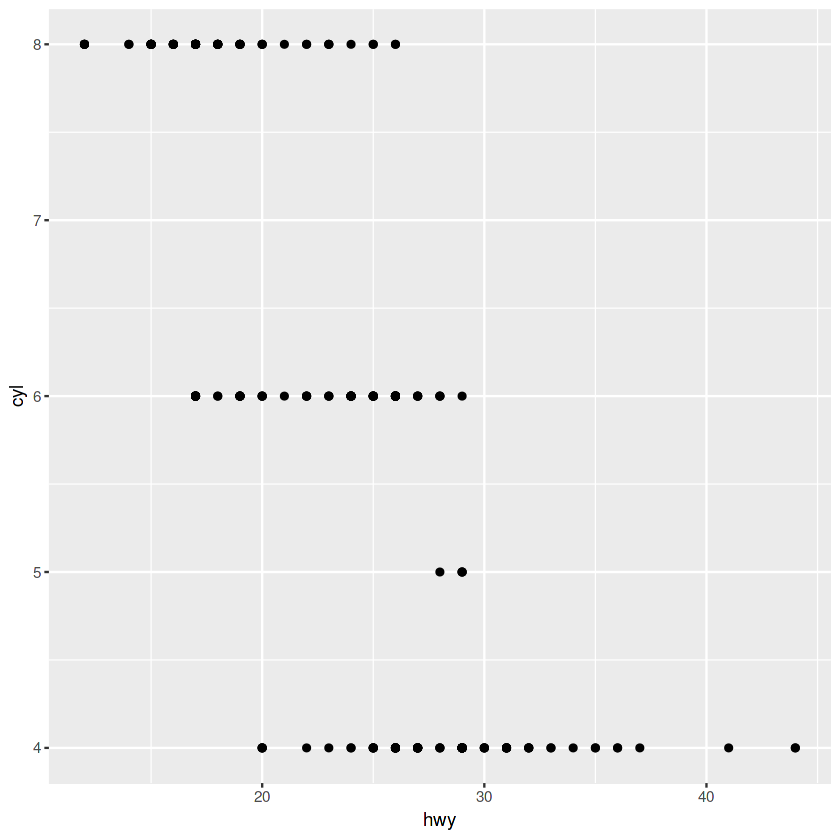

In [4]:
#ggplot(data = <DATA>) + <GEOM_FUNCTIONS>(mapping = aes(<MAPPINGS>))
ggplot(data = mpg) + geom_point(mapping = aes(x = hwy,y = cyl))

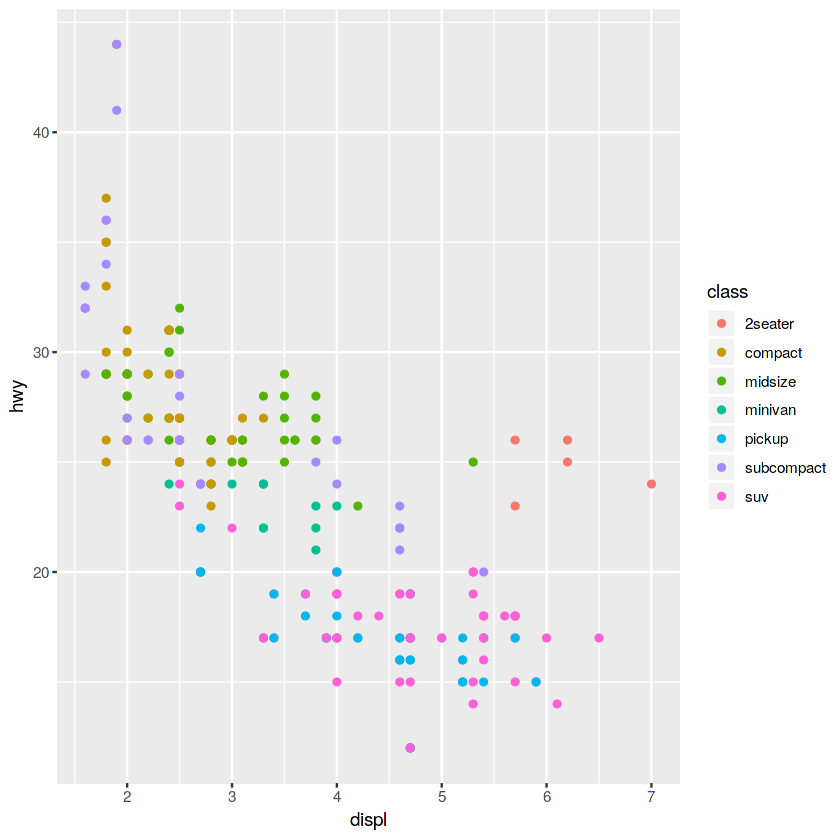

In [5]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ,y = hwy,color=class))

Warning message:
“Using size for a discrete variable is not advised.”

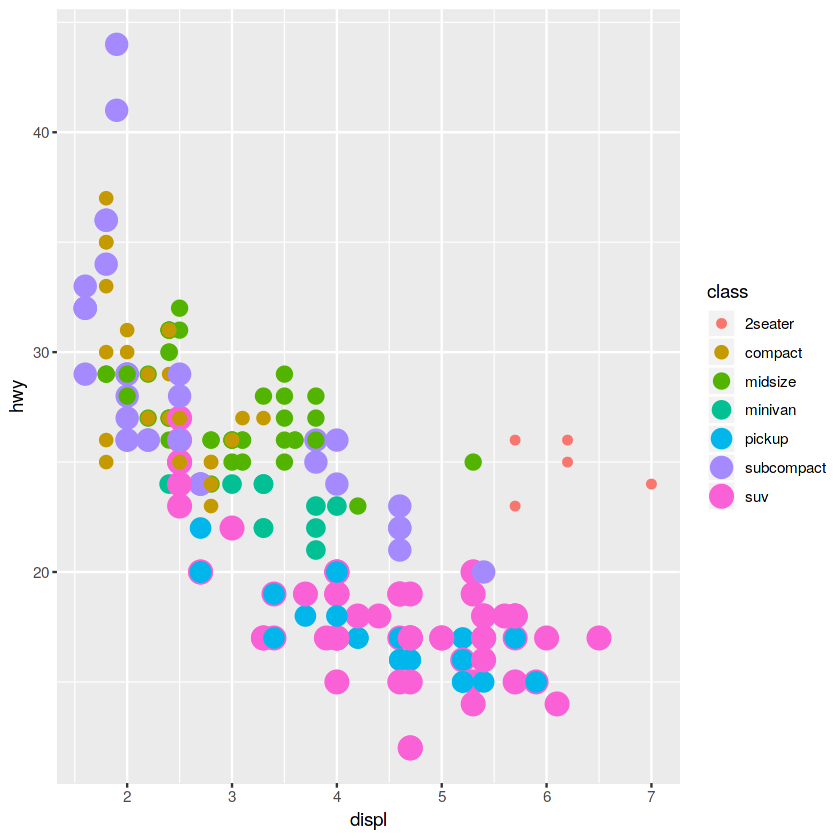

In [6]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ,y = hwy,color=class,size=class))

In [7]:
#alpha affects transparency, shape affects the symbols used in the plot. All based on the column 'class'
#ggplot(data = mpg) + geom_point(mapping = aes(x = displ,y = hwy,color=class,alpha=class))
#ggplot(data = mpg) + geom_point(mapping = aes(x = displ,y = hwy,color=class,shape=class))

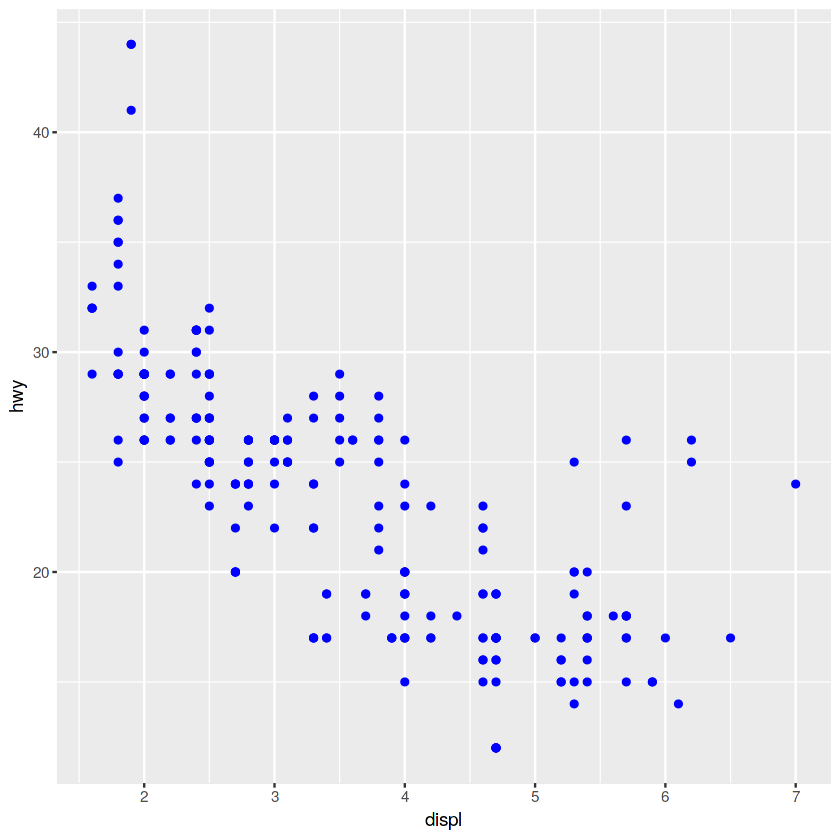

In [8]:
#the color blue is a parameter of geom_point if it is not being used dynamically with data
ggplot(data = mpg) + geom_point(mapping = aes(x = displ,y = hwy,color=class),color='blue')

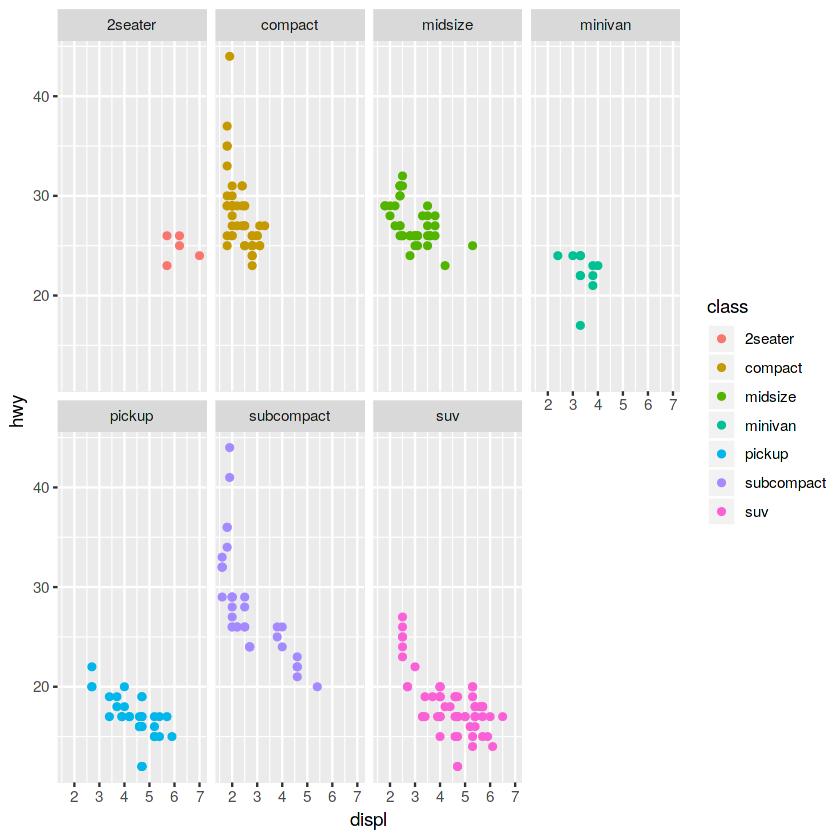

In [9]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ,y = hwy,color=class)) + facet_wrap( ~ class,nrow =2)

individual plots of display against highway miles per gallon for each class

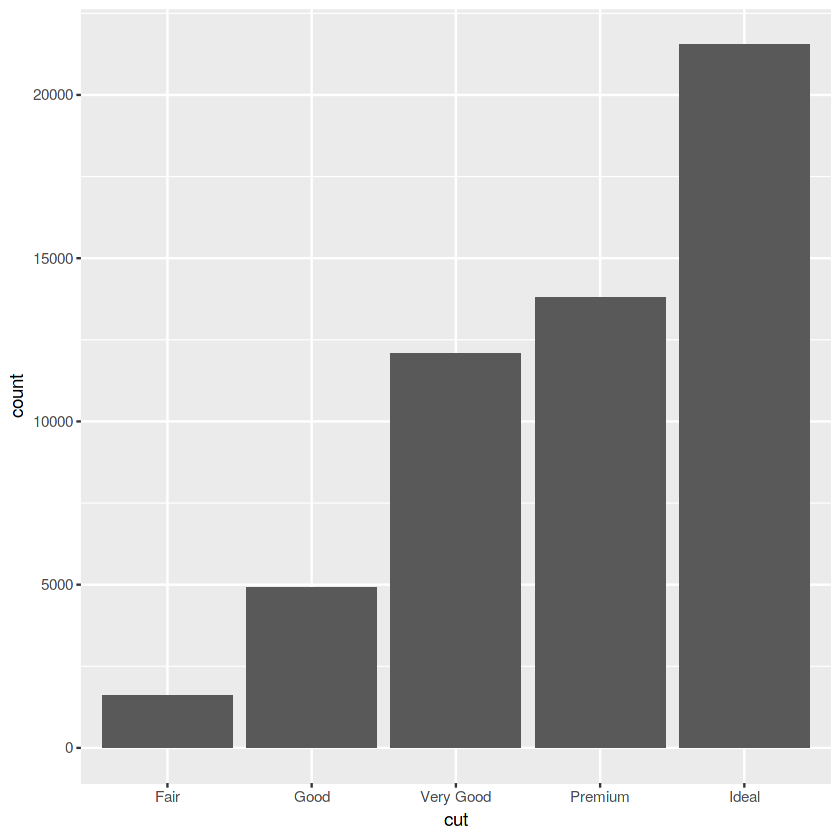

In [10]:
ggplot(data = diamonds) +
geom_bar(mapping = aes(x = cut))

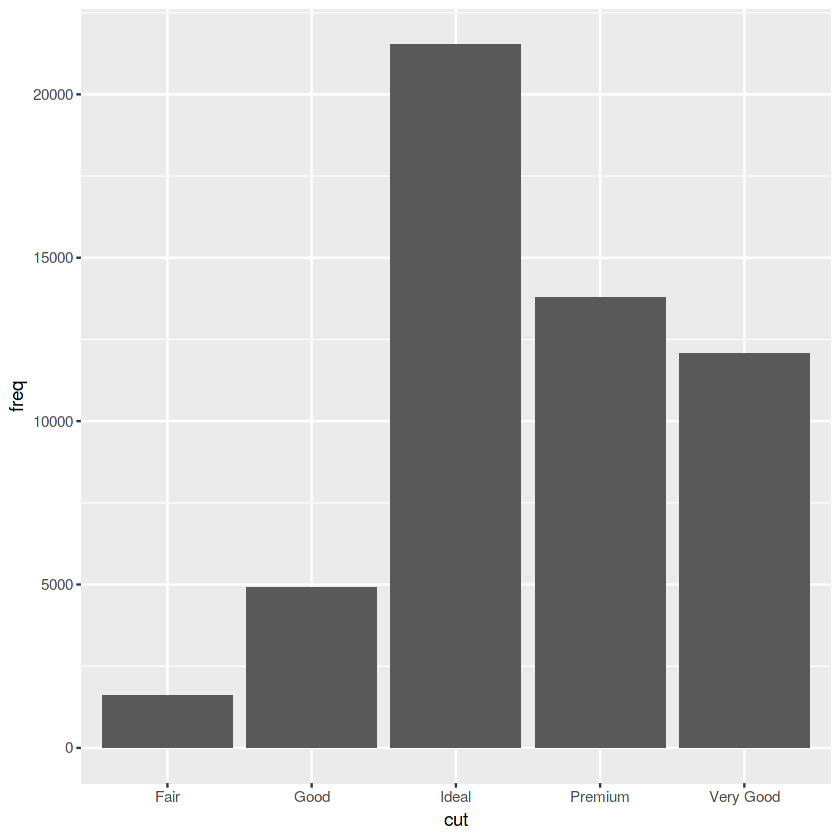

In [11]:
#this is like a temp table/temp dataframe
demo <- tribble(~cut,~freq,
               'Fair',1610,
               'Good',4906,
               'Very Good',12082,
               'Premium',13791,
               'Ideal',21531)
ggplot(data = demo) +
geom_bar(mapping = aes(x = cut, y = freq),stat = 'identity')

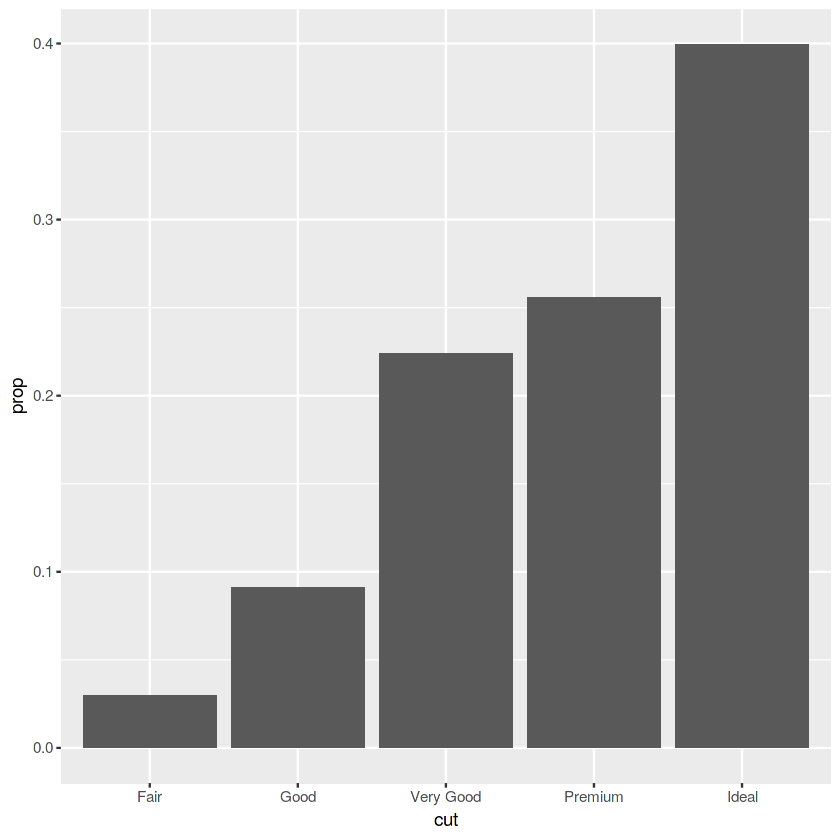

In [12]:
#bar chart for proportion rather than count
ggplot(data = diamonds) +
geom_bar(mapping = aes(x = cut, y = ..prop.., group = 1))

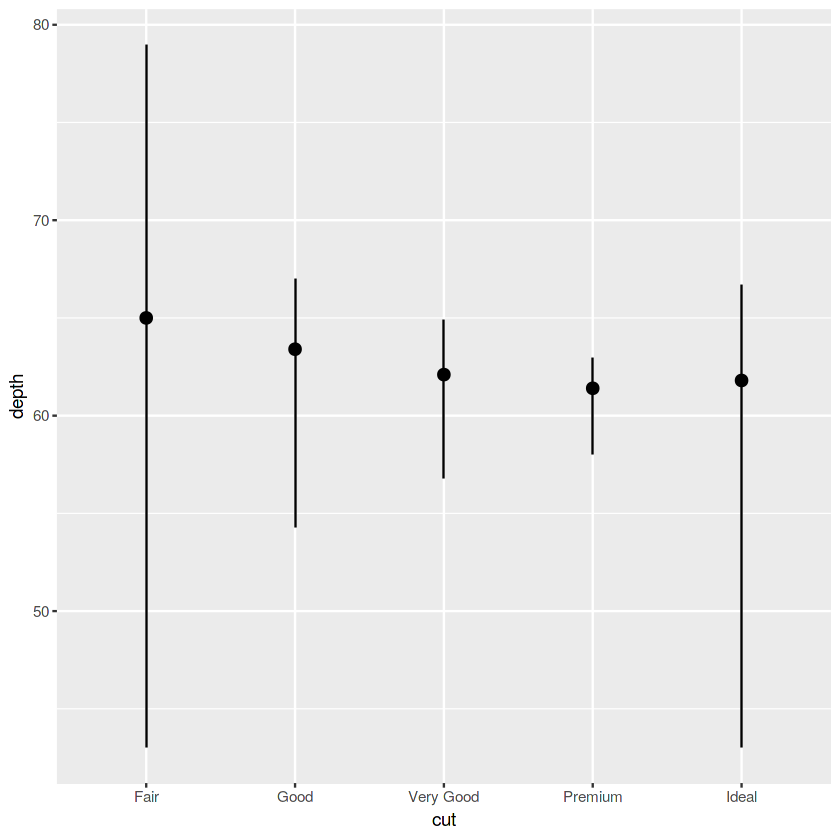

In [13]:
#using stat_summary is a way of summarising the y value for each x value
ggplot(data = diamonds) +
stat_summary(
mapping = aes(x = cut, y = depth),fun.ymin = min,fun.ymax = max, fun.y = median)

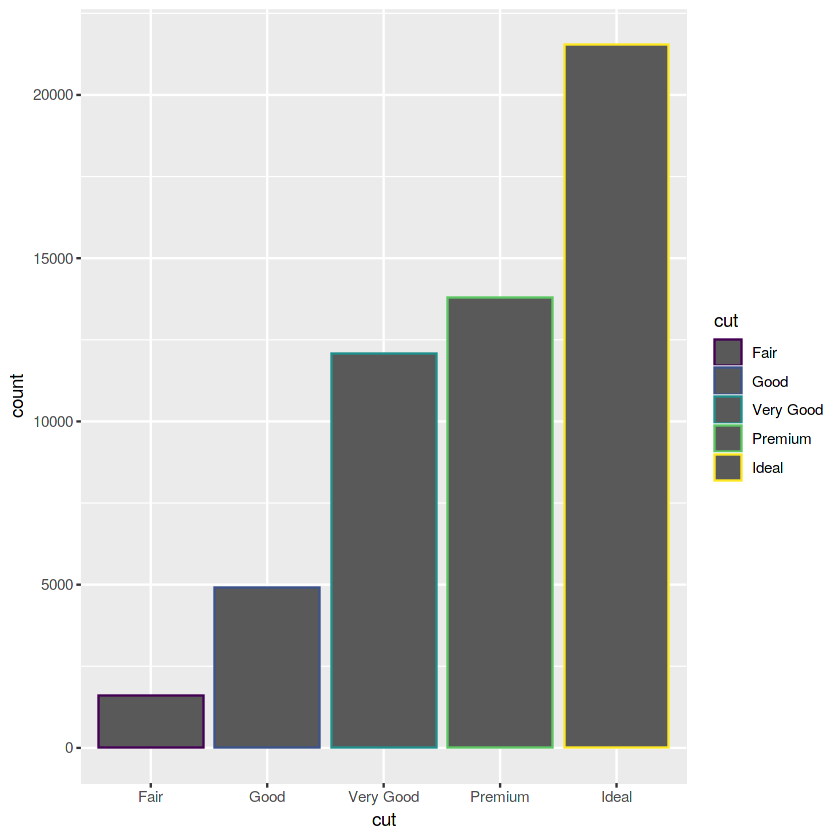

In [14]:
#Position Arguments (coloring bar charts)

#This version just colours the borders
ggplot(data = diamonds) +
geom_bar(mapping = aes(x = cut,color= cut))

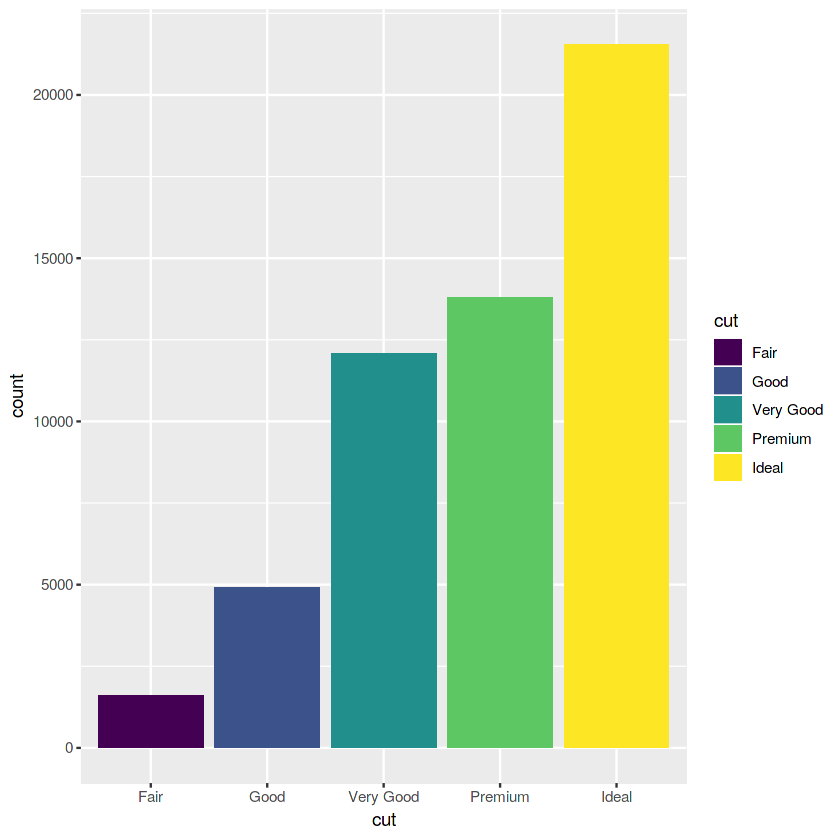

In [15]:
#positional arguments 2, full colour bars

#bar defaults to a count. 
#then in the aesthetic function, we specified the fill parameter based on cut, which is also the x param
ggplot(data = diamonds) +
geom_bar(mapping = aes(x = cut, fill = cut))

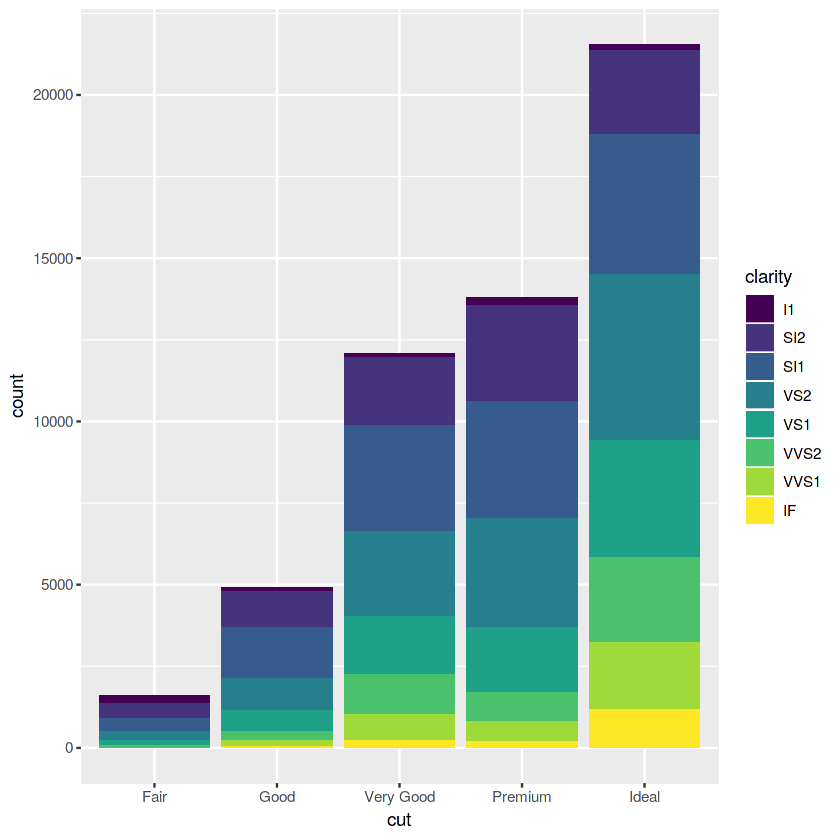

In [16]:
#by supplying a categorical fill value, we get a stacked bar
ggplot(data = diamonds) +
geom_bar(mapping = aes(x = cut, fill = clarity))

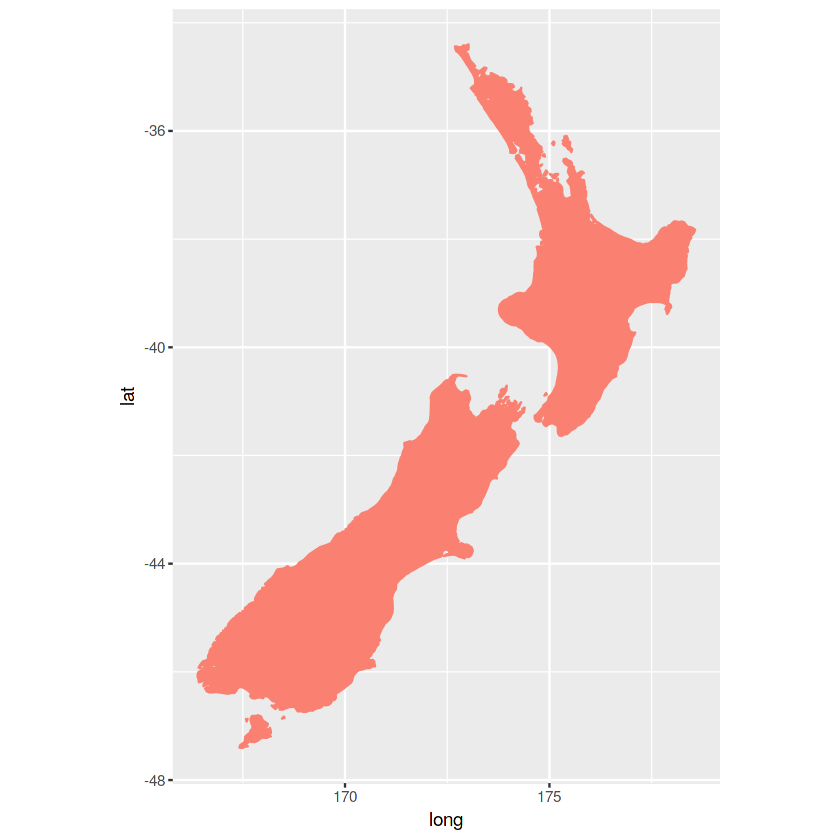

In [17]:
nz <- map_data('nz')
ggplot(nz,aes(long,lat,group=group)) +
geom_polygon(fill='salmon',color='salmon') +
coord_quickmap()

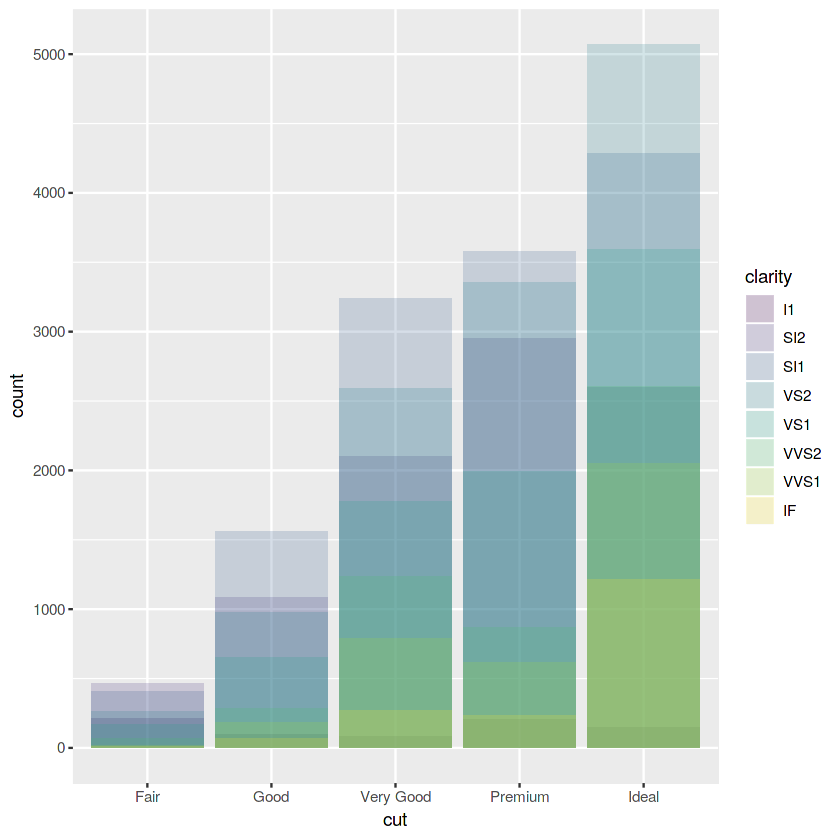

In [18]:
#passing the mapping straight in to gg plot
#we then specify geometric bar and alpha is used to alter the transparency
ggplot(data = diamonds, mapping = aes(x = cut, fill = clarity)) +
geom_bar(alpha = 1/5, position = 'identity')

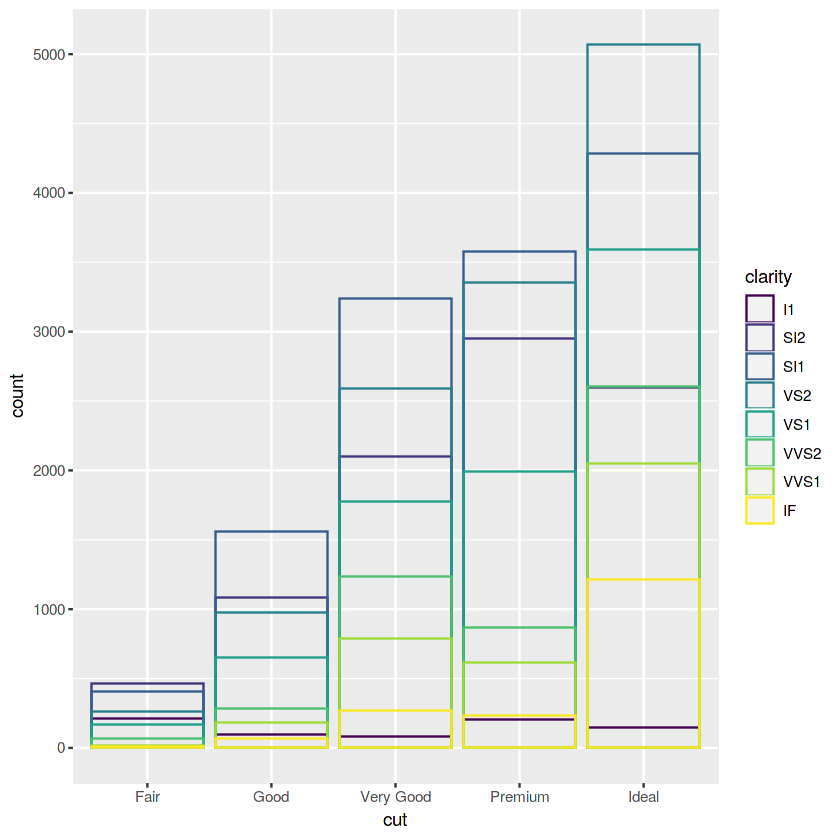

In [19]:
#wireframes only
ggplot(data = diamonds, mapping = aes(x = cut, color = clarity)) +
geom_bar(fill = NA, position = 'identity')

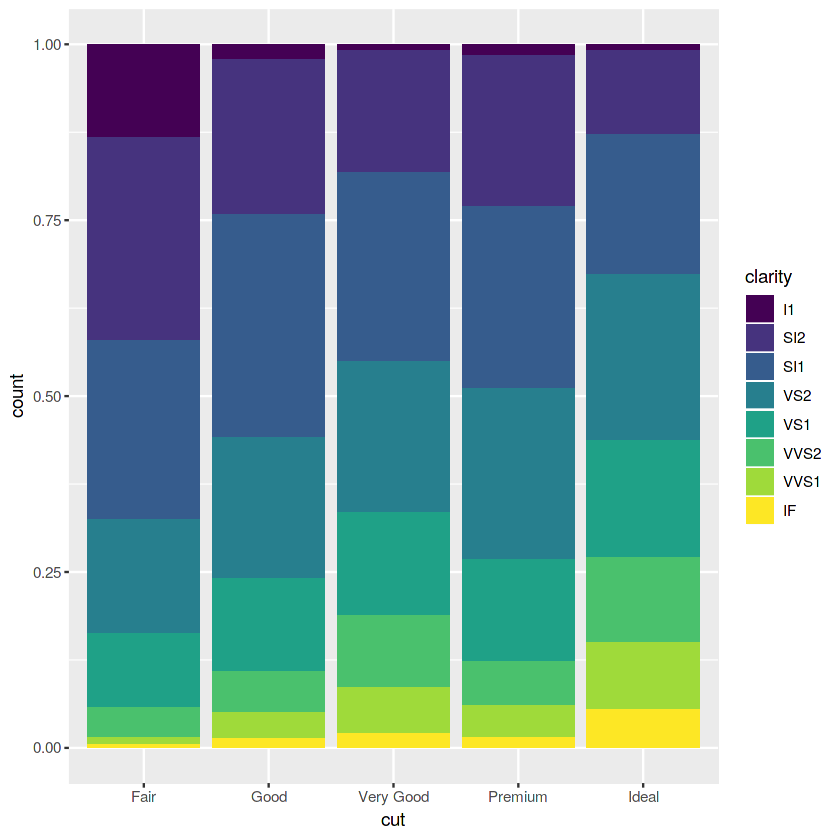

In [20]:
ggplot(data = diamonds) +
geom_bar(mapping = aes(x = cut, fill = clarity), position = 'fill')

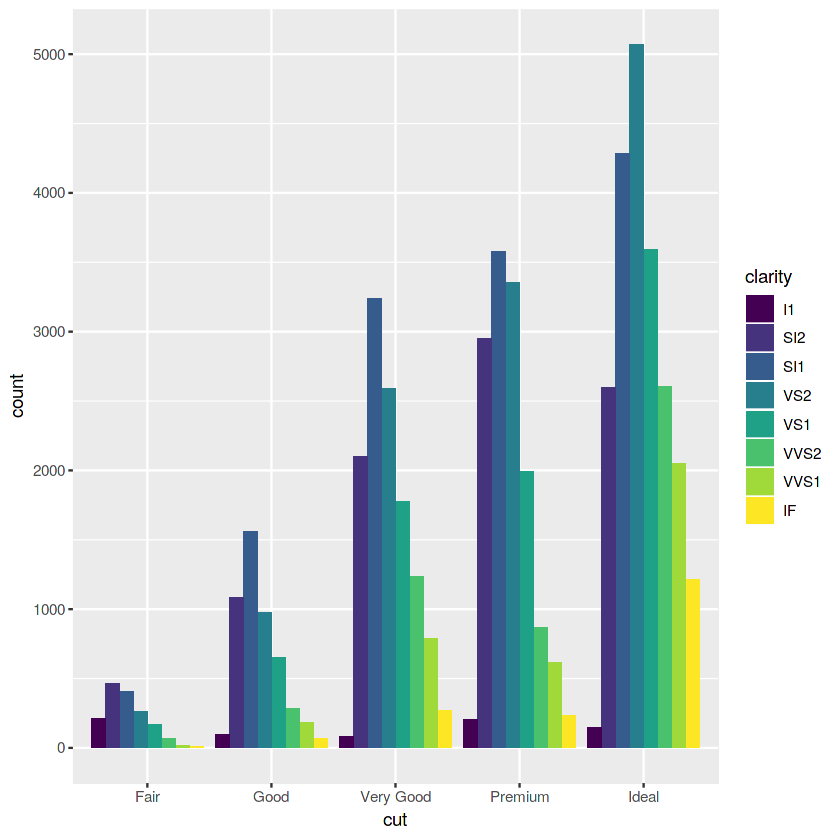

In [21]:
#frequencies of cut against clarity
ggplot(data = diamonds) +
geom_bar(mapping = aes(x = cut,fill = clarity), position = 'dodge')

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


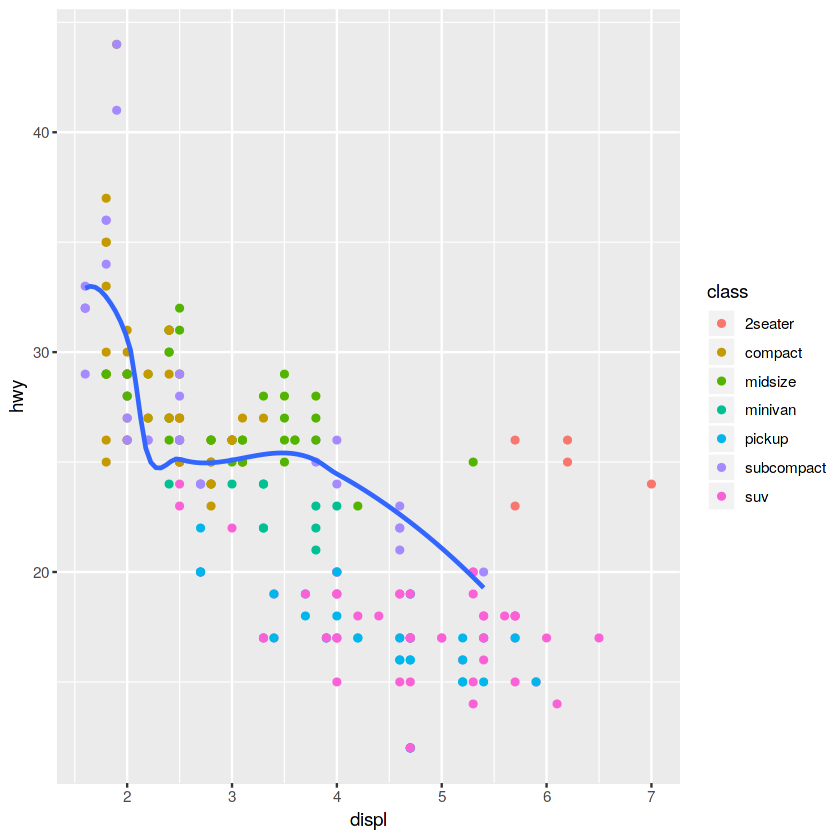

In [30]:
#multiple geoms on same data
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
geom_point(mapping = aes(color=class)) + 
geom_smooth(data = filter(mpg,class=='subcompact'), se = FALSE)

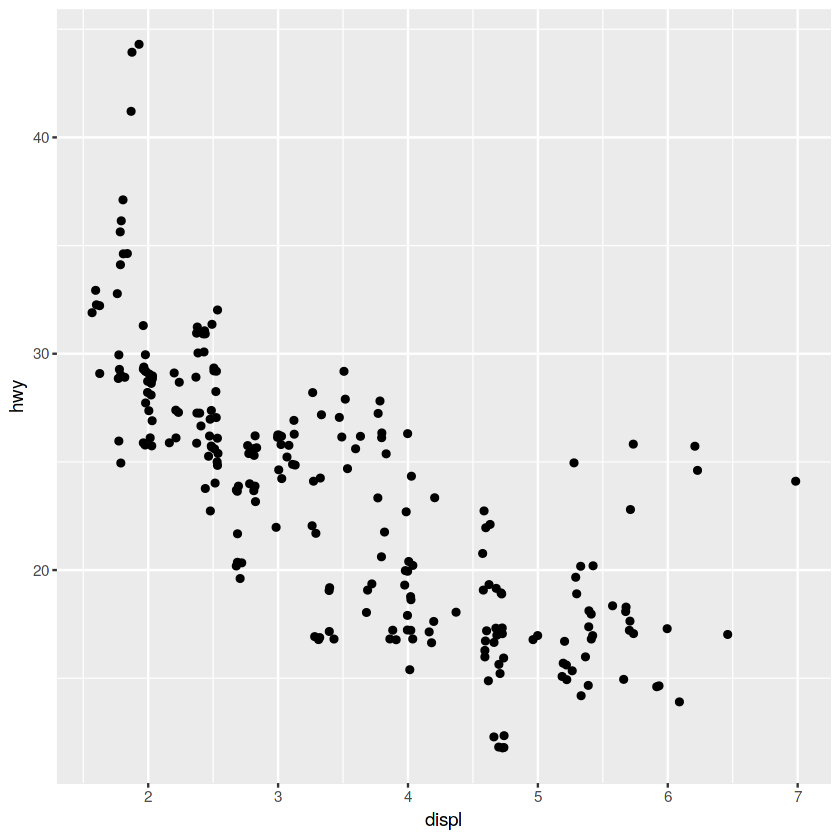

In [37]:
#geom point usually performs rounding on x and y values.
#the argument jitter adds a small amount of noise back in so the points can be plotted in full
ggplot(data = mpg) +
geom_point(mapping = aes(x = displ, y = hwy), position = 'jitter')

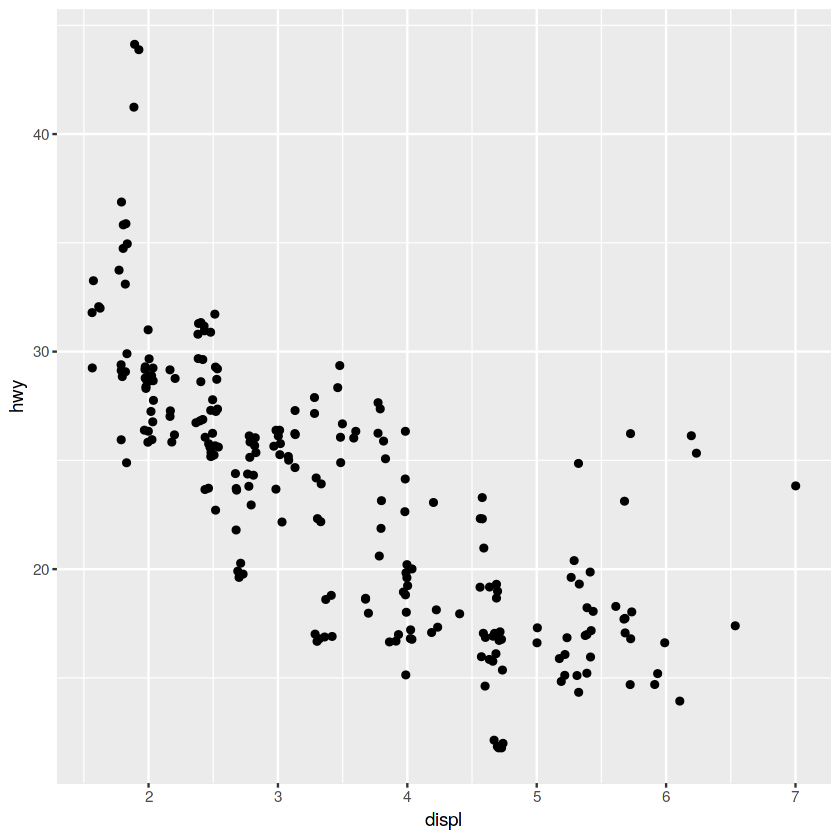

In [38]:
ggplot(data = mpg) +
geom_jitter(mapping = aes(x = displ, y = hwy))

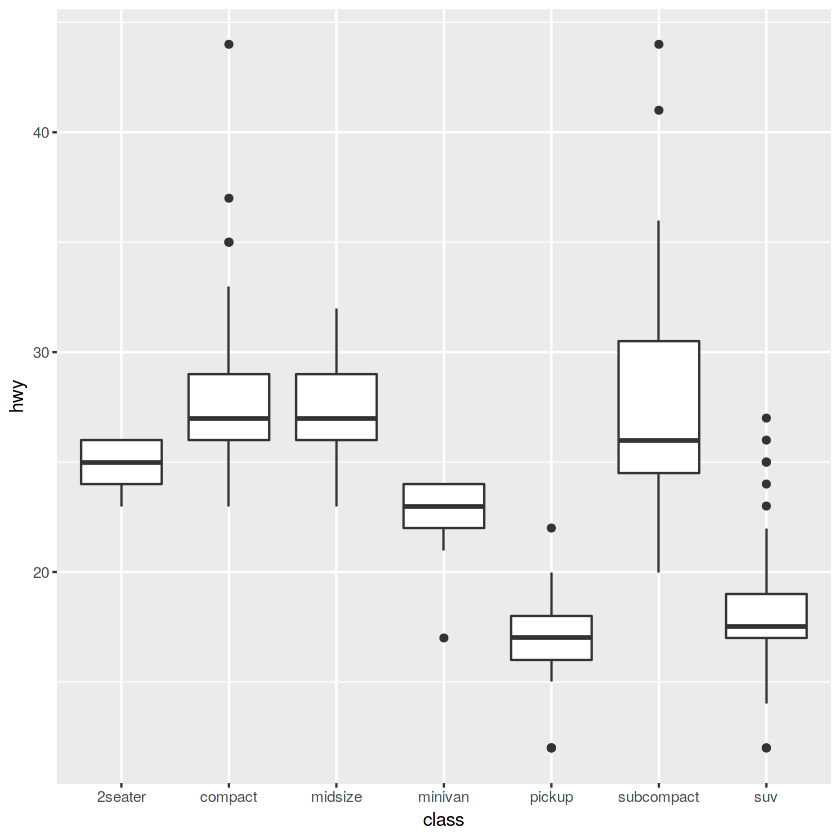

In [42]:
#normal set of box plots
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
geom_boxplot()

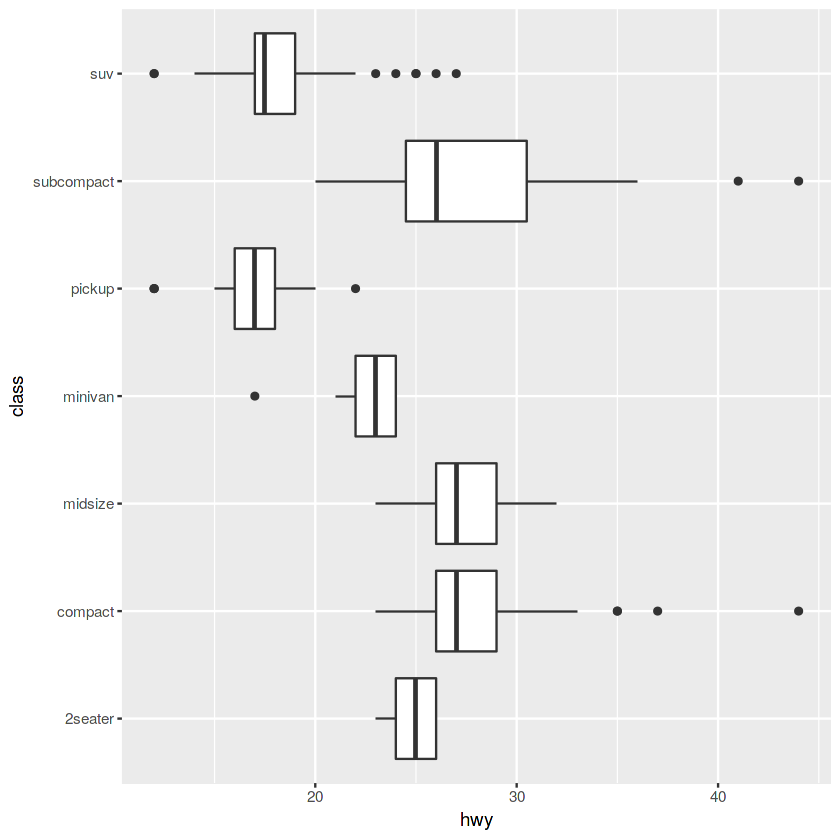

In [43]:
#normal set of box plots, but x and y are flipped
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
geom_boxplot() +
coord_flip()

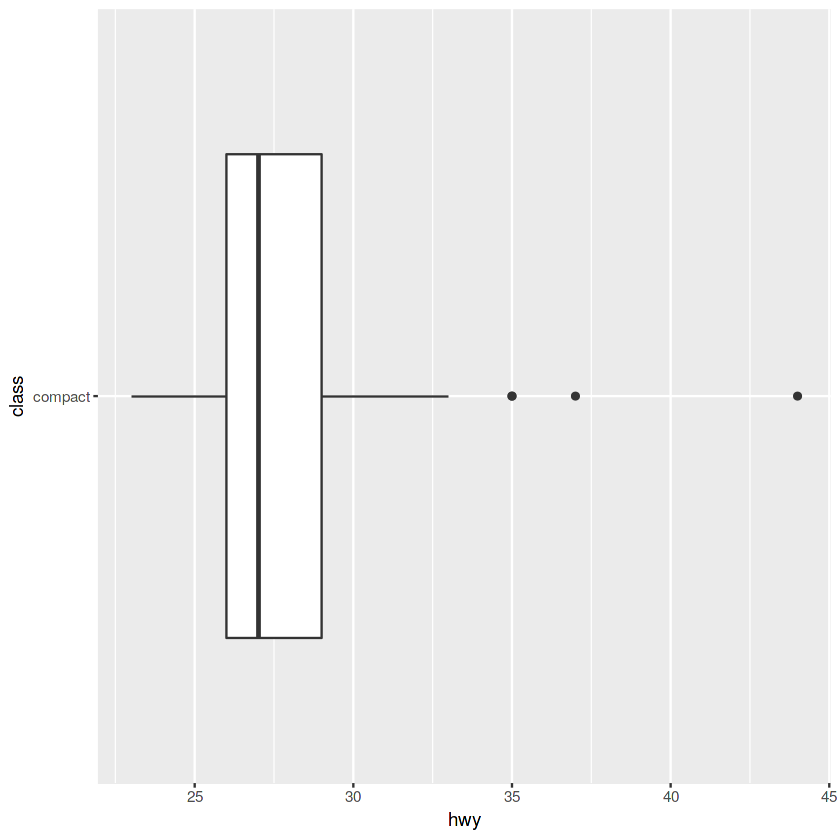

In [49]:
#singling out compacts for a box plot
ggplot(data = filter(mpg,class=='compact'), mapping = aes(x = class, y = hwy)) + 
geom_boxplot() +
coord_flip()

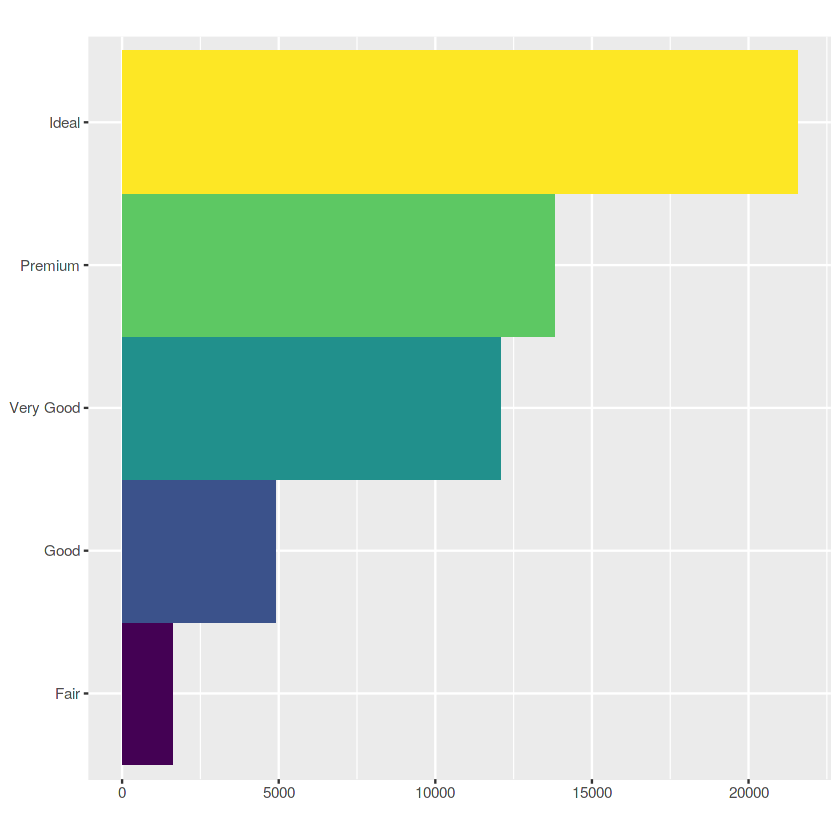

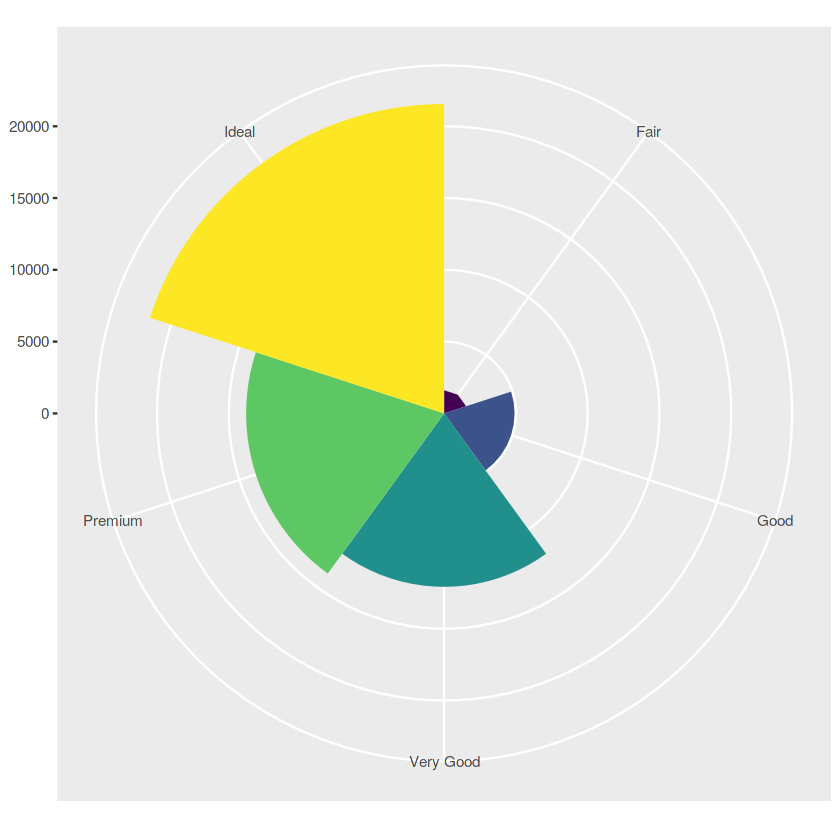

In [54]:
bar <- ggplot(data = diamonds) +
geom_bar(mapping = aes(x = cut, fill = cut),
        show.legend = FALSE,
        width = 1) +
theme(aspect.ratio = 1) +
labs(x = NULL,y = NULL)

bar + coord_flip()
bar + coord_polar()

In [ ]:
#General template
#ggplot(data = <DATA>) +
#<GEOM_FUNCTION>(
# mapping = aes(<MAPPINGS>),
# stat = <STAT>,
#position = <POSITION>,
#) +
#<COORDINTE_FUNCTION> +
#<FACET_FUNCTION>

#supply data to the ggplot, at least one geom, a mapping (what to display on each eaxis)
#a stat, a thing which has been computed, a position, such as 'dodge', 'fill', 'identity'
#coordinates such as coord_polar or coord_flip, to flip x and y
#and a facet function, used to make a grid of plots based on some values, similar to subplots